In [1]:
# Depencies
import pandas as pd

In [2]:
# Read whites_df from csv file
whites_df = pd.read_csv('../data/whites_df.csv')
# Drop imported index
whites_df = whites_df.drop(['Unnamed: 0'], axis= 1)

In [3]:
whites_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,medium


In [4]:
# Install PyCaret
!pip install pycaret

In [5]:
#Check the shape of the data for white wines
print(f'Shape of the white wine data: {whites_df.shape}')

Shape of the white wine data: (4898, 12)


In [6]:
# Split data to create models and tunning
data_white = whites_df.sample(frac=0.95, random_state=786)
data_white_unseen = whites_df.drop(data_white.index)
data_white.reset_index(inplace= True, drop= True)
data_white_unseen.reset_index(inplace= True, drop= True)

print('Data for Modeling (whites): ' + str(data_white.shape))
print('----------------------------------------------------')
print('Unseen Data For Predictions (whites): ' + str(data_white_unseen.shape))

Data for Modeling (whites): (4653, 12)
----------------------------------------------------
Unseen Data For Predictions (whites): (245, 12)


In [7]:
# Import pycaret classification
from pycaret.classification import *

In [8]:
# Set up environment and create the transformation pipeline to prepare the data for modeling and deployment.
# Data Type Inference:  Any experiment performed in PyCaret begins with determining the correct data types for all features. The setup function performs essential inferences about the data and performs several downstream tasks such as ignoring ID and Date columns, categorical encoding, missing values imputation based on the data type inferred by PyCaret’s internal algorithm. Once the setup is executed a dialogue box (see example below) appears with the list of all the features and their inferred data types. Data type inferences are usually correct but once the dialogue box appears, user should review the list for accuracy. If all the data types are inferred correctly you may press enter to continue or if not you may type ‘quit‘ to stop the experiment.
print('Data set up for white wines')
exp_clf101 = setup(data = data_white, target = 'quality_category', session_id= 123)

,Description,Value
0,session_id,123
1,Target,quality_category
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, medium: 2"
4,Original Data,"(4653, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# Comparison of models --- whites
best_models_whites = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9678,0.8563,0.4401,0.9629,0.9585,0.3786,0.4608,0.0950
lightgbm,Light Gradient Boosting Machine,0.9675,0.8358,0.4339,0.9627,0.9591,0.3904,0.4582,0.1610
et,Extra Trees Classifier,0.9671,0.8921,0.4260,0.9617,0.9581,0.3737,0.4542,0.0620
gbc,Gradient Boosting Classifier,0.9616,0.8392,0.4116,0.9519,0.9514,0.2652,0.3247,0.2700
lr,Logistic Regression,0.9589,0.7526,0.3333,0.9197,0.9389,0.0062,0.0126,0.7710
knn,K Neighbors Classifier,0.9589,0.6672,0.3572,0.9395,0.9433,0.1069,0.1631,0.3010
ridge,Ridge Classifier,0.9589,0.0000,0.3333,0.9194,0.9387,0.0000,0.0000,0.0060
svm,SVM - Linear Kernel,0.9573,0.0000,0.3355,0.9208,0.9384,0.0084,0.0102,0.0130
lda,Linear Discriminant Analysis,0.9567,0.7464,0.4156,0.9213,0.9385,0.0406,0.0643,0.0060
dt,Decision Tree Classifier,0.9380,0.6581,0.4921,0.9434,0.9403,0.2825,0.2852,0.0080


In [10]:
# Print the best model = Random Forest Classifier (based on accuracy) --- whites
print(best_models_whites)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [11]:
# List of the models
# Top 3: rf, lightgbm, et --- whites
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
# Creating the best model (random forrest classifier)
# Top 3: rf, lightgbm, et --- whites
rf_whites = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9693,0.8784,0.4434,0.9627,0.9623,0.4324,0.4851
1,0.9724,0.8868,0.4444,0.9701,0.9649,0.4609,0.5470
2,0.9663,0.8642,0.4156,0.9579,0.9573,0.3411,0.4048
3,0.9693,0.9130,0.4605,0.9634,0.9629,0.4873,0.5341
4,0.9632,0.8149,0.3889,0.9584,0.9495,0.2424,0.3711
5,0.9663,0.6594,0.4167,0.9613,0.9552,0.3437,0.4552
6,0.9632,0.8957,0.5278,0.9646,0.9488,0.2439,0.3737
7,0.9723,0.8667,0.4444,0.9700,0.9648,0.4608,0.5469
8,0.9662,0.9068,0.4156,0.9578,0.9572,0.3410,0.4047
9,0.9692,0.8774,0.4434,0.9625,0.9622,0.4323,0.4851


In [13]:
# Creating the best model (random forrest classifier)
# Top 3: rf, lightgbm, et --- whites
lightgbm_whites = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9663,0.8370,0.4423,0.9577,0.9598,0.4067,0.4391
1,0.9693,0.8695,0.4434,0.9700,0.9634,0.4334,0.4866
2,0.9663,0.7231,0.4156,0.9579,0.9573,0.3411,0.4048
3,0.9693,0.9136,0.4850,0.9629,0.9647,0.5313,0.5535
4,0.9632,0.7743,0.3889,0.9584,0.9495,0.2424,0.3711
5,0.9693,0.7606,0.4444,0.9641,0.9604,0.4344,0.5264
6,0.9601,0.8639,0.3611,0.9556,0.9432,0.1287,0.2620
7,0.9754,0.8813,0.4722,0.9729,0.9696,0.5459,0.6124
8,0.9692,0.8563,0.4434,0.9699,0.9633,0.4334,0.4866
9,0.9662,0.8779,0.4423,0.9575,0.9597,0.4066,0.4390


In [14]:
# Creating the best model (random forrest classifier)
# Top 3: rf, lightgbm, et --- whites
et_whites = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9601,0.8785,0.4135,0.9485,0.9527,0.2988,0.3226
1,0.9724,0.9168,0.4444,0.9701,0.9649,0.4609,0.5470
2,0.9693,0.8579,0.4167,0.9672,0.9598,0.3659,0.4729
3,0.9693,0.9329,0.4605,0.9634,0.9629,0.4873,0.5341
4,0.9632,0.8430,0.3889,0.9584,0.9495,0.2424,0.3711
5,0.9693,0.8398,0.4444,0.9641,0.9604,0.4344,0.5264
6,0.9632,0.9304,0.3889,0.9584,0.9495,0.2424,0.3711
7,0.9692,0.9313,0.4434,0.9625,0.9622,0.4323,0.4851
8,0.9692,0.9044,0.4167,0.9671,0.9596,0.3659,0.4729
9,0.9662,0.8861,0.4423,0.9575,0.9597,0.4066,0.4390


In [15]:
# Top 3: rf, lightgbm, et --- whites
print('rf for whites model')
print(rf_whites)
print('----------------------------------------------')
print('lightgbm for whites model')
print(lightgbm_whites)
print('----------------------------------------------')
print('et for whites model')
print(et_whites)
print('----------------------------------------------')

rf for whites model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
----------------------------------------------
lightgbm for whites model
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lamb

In [16]:
# Tune models for --- whites
# Top 3: rf, lightgbm, et --- whites
tuned_whites_rf = tune_model(rf_whites)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9601,0.5000,0.3333,0.9218,0.9406,0.0000,0.0000
1,0.9601,0.5000,0.3333,0.9218,0.9406,0.0000,0.0000
2,0.9601,0.5000,0.3333,0.9218,0.9406,0.0000,0.0000
3,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
4,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
5,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
6,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
7,0.9600,0.5000,0.3333,0.9216,0.9404,0.0000,0.0000
8,0.9600,0.5000,0.3333,0.9216,0.9404,0.0000,0.0000
9,0.9600,0.5000,0.3333,0.9216,0.9404,0.0000,0.0000


In [17]:
# Tune models for --- whites
# Top 3: rf, lightgbm, et --- whites
tuned_whites_lightgbm = tune_model(lightgbm_whites)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9663,0.8500,0.4156,0.9579,0.9573,0.3411,0.4048
1,0.9663,0.8701,0.4423,0.9626,0.9608,0.4078,0.4404
2,0.9601,0.7981,0.3600,0.9430,0.9458,0.1244,0.1851
3,0.9693,0.9193,0.4359,0.9672,0.9607,0.4340,0.5262
4,0.9601,0.8155,0.3611,0.9556,0.9432,0.1287,0.2620
5,0.9663,0.7924,0.4167,0.9613,0.9552,0.3437,0.4552
6,0.9571,0.8927,0.3600,0.9371,0.9412,0.1162,0.1778
7,0.9631,0.8913,0.4145,0.9577,0.9556,0.3201,0.3594
8,0.9692,0.8822,0.4167,0.9671,0.9596,0.3659,0.4729
9,0.9631,0.8678,0.4145,0.9522,0.9548,0.3188,0.3577


In [18]:
# Tune models for --- whites
# Top 3: rf, lightgbm, et --- whites
tuned_whites_et = tune_model(et_whites)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9601,0.5000,0.3333,0.9218,0.9406,0.0000,0.0000
1,0.9601,0.5000,0.3333,0.9218,0.9406,0.0000,0.0000
2,0.9601,0.5000,0.3333,0.9218,0.9406,0.0000,0.0000
3,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
4,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
5,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
6,0.9571,0.5000,0.3333,0.9160,0.9361,0.0000,0.0000
7,0.9600,0.5000,0.3333,0.9216,0.9404,0.0000,0.0000
8,0.9600,0.5000,0.3333,0.9216,0.9404,0.0000,0.0000
9,0.9600,0.5000,0.3333,0.9216,0.9404,0.0000,0.0000


In [19]:
# Top 3: rf, lightgbm, et --- whites
print('tuned rf for whites model')
print(tuned_whites_rf)
print('----------------------------------------------')
print('tuned lightgbm for whites model')
print(tuned_whites_lightgbm)
print('----------------------------------------------')
print('tuned et for whites model')
print(tuned_whites_et)
print('----------------------------------------------')

tuned rf for whites model
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
----------------------------------------------
tuned lightgbm for whites model
LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_le

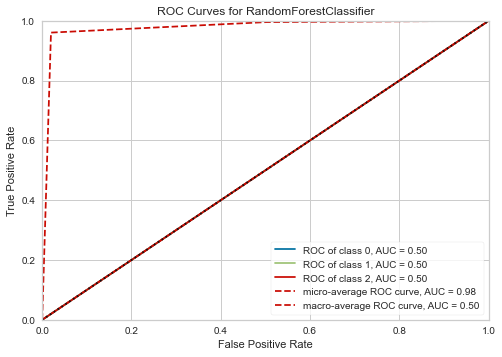

In [20]:
# plot models for accuracy
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_rf, plot = 'auc')

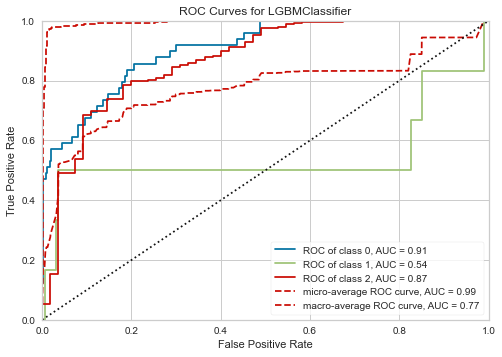

In [21]:
# plot models for accuracy
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_lightgbm, plot = 'auc')

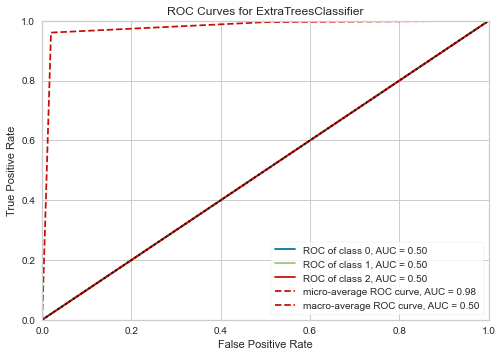

In [22]:
# plot models for accuracy
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_et, plot = 'auc')

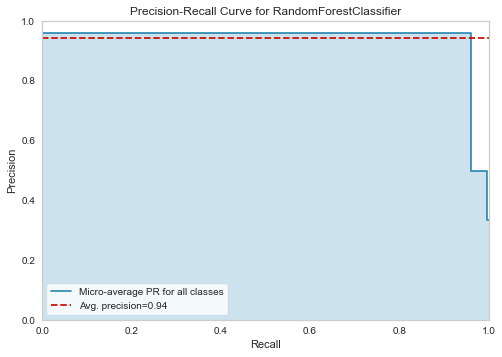

In [23]:
# plot models for precision-recall
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_rf, plot = 'pr')

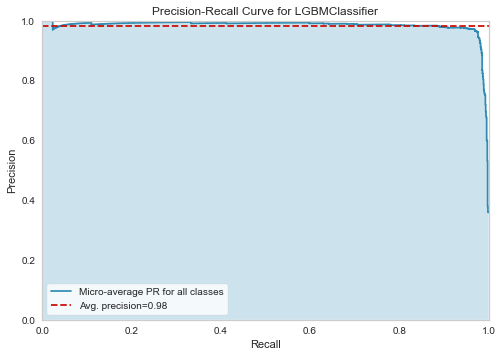

In [24]:
# plot models for precision-recall
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_lightgbm, plot = 'pr')

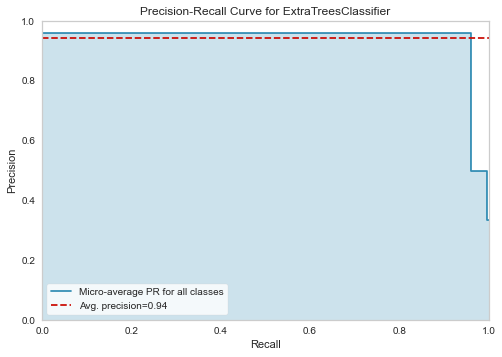

In [25]:
# plot models for precision-recall
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_et, plot = 'pr')

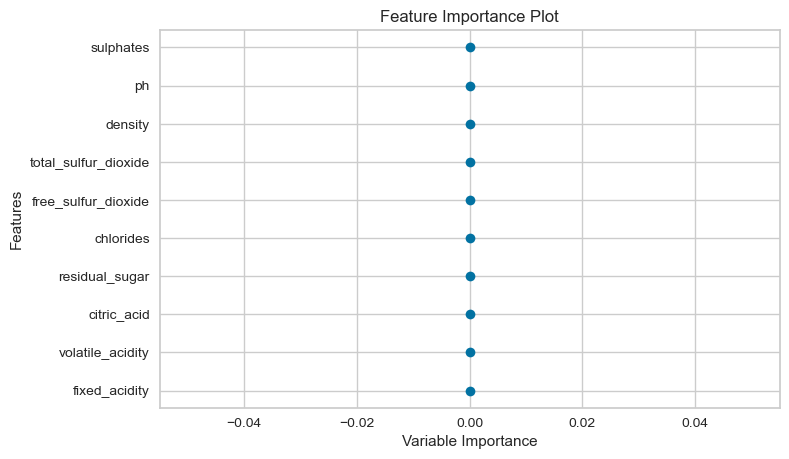

In [26]:
# plot models for feature importance
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_rf, plot = 'feature')

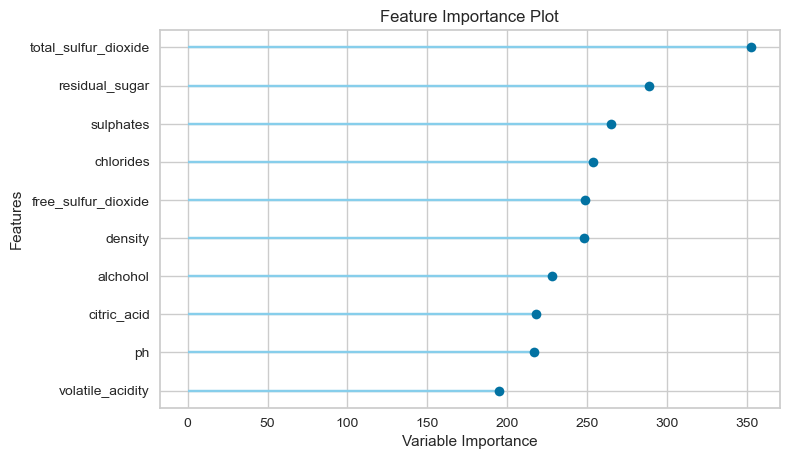

In [27]:
# plot models for feature importance
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_lightgbm, plot = 'feature')

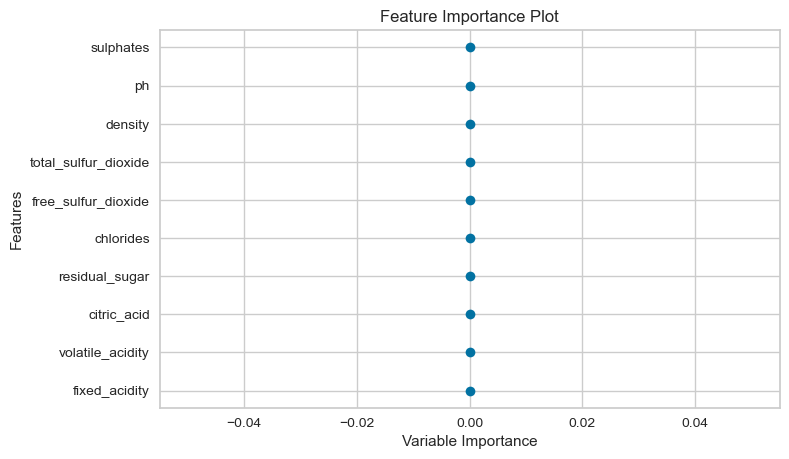

In [28]:
# plot models for feature importance
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_et, plot = 'feature')

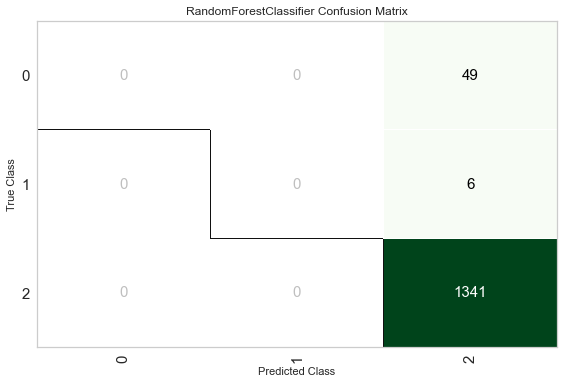

In [29]:
# plot models for confusion matrix
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_rf, plot = 'confusion_matrix')

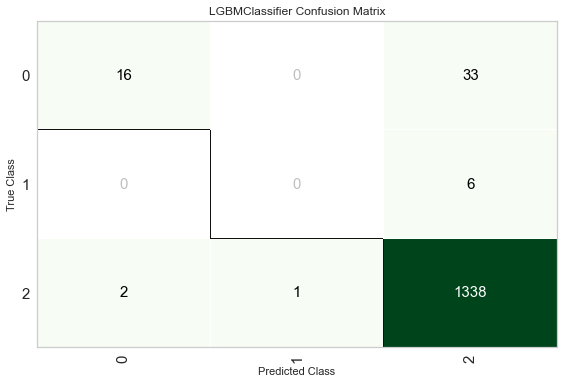

In [30]:
# plot models for confusion matrix
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_lightgbm, plot = 'confusion_matrix')

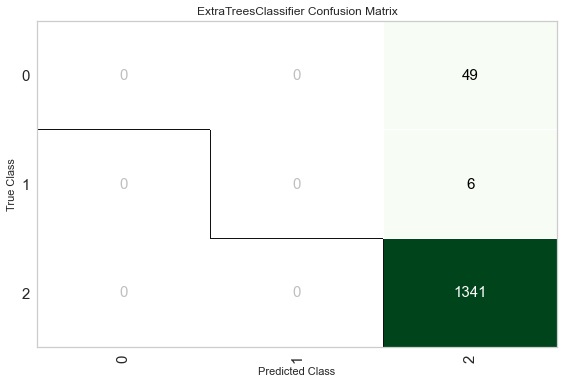

In [31]:
# plot models for confusion matrix
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_et, plot = 'confusion_matrix')

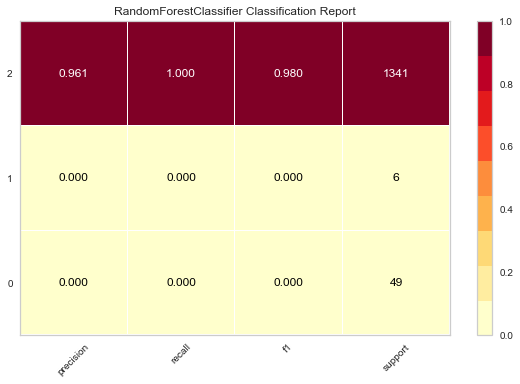

In [32]:
# plot models for classification report
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_rf, plot = 'class_report')

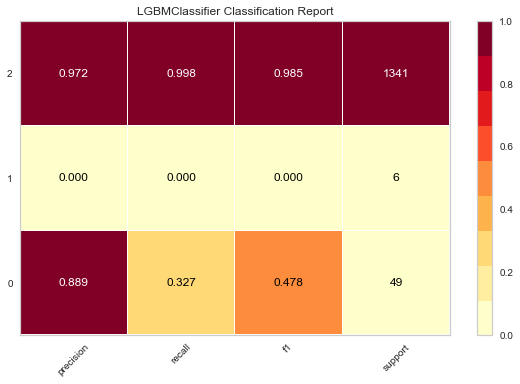

In [33]:
# plot models for classification report
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_lightgbm, plot = 'class_report')

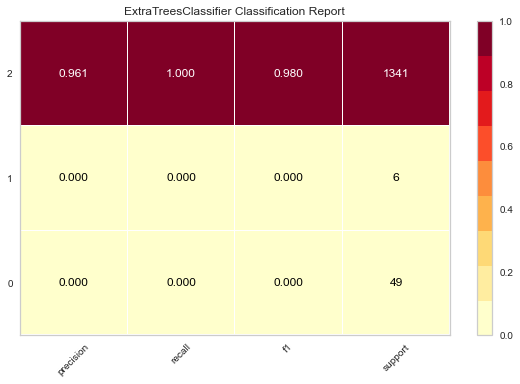

In [34]:
# plot models for classification report
# Top 3: rf, lightgbm, et --- whites
plot_model(tuned_whites_et, plot = 'class_report')

In [35]:
# Only tunnning the top model, rf, since the top three models are so close will only focus on the top model.
# Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.
evaluate_model(tuned_whites_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
#  Predict model, add probablylity of each category
predict_model(tuned_whites_rf, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9606,0,0.3333,0.9228,0.9413,0.0000,0.0000


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category,Label,Score_high,Score_low,Score_medium
0,8.0,0.43,0.40,12.40,0.168,29.0,190.0,0.99910,3.07,0.64,9.2,medium,medium,0.0372,0.004,0.9589
1,6.3,0.17,0.32,4.20,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,medium,medium,0.0372,0.004,0.9589
2,7.6,0.28,0.39,1.20,0.038,21.0,115.0,0.99400,3.16,0.67,10.0,medium,medium,0.0372,0.004,0.9589
3,5.1,0.33,0.22,1.60,0.027,18.0,89.0,0.98930,3.51,0.38,12.5,medium,medium,0.0372,0.004,0.9589
4,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,medium,medium,0.0372,0.004,0.9589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,6.6,0.27,0.25,1.20,0.033,36.0,111.0,0.98918,3.16,0.37,12.4,medium,medium,0.0372,0.004,0.9589
1392,6.7,0.19,0.39,1.00,0.032,14.0,71.0,0.98912,3.31,0.38,13.0,medium,medium,0.0372,0.004,0.9589
1393,9.3,0.34,0.49,7.30,0.052,30.0,146.0,0.99800,3.17,0.61,10.2,medium,medium,0.0372,0.004,0.9589
1394,7.3,0.34,0.22,1.40,0.044,43.0,176.0,0.99286,3.14,0.46,9.9,medium,medium,0.0372,0.004,0.9589


In [37]:
# Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production
final_whites_rf = finalize_model(tuned_whites_rf)

In [38]:
#Final Random Forest model parameters for deployment
print(final_whites_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [39]:
# Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_rf under predict_model() to compare the information grid with the one above in section 11.
predict_model(final_whites_rf, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9606,0,0.3333,0.9228,0.9413,0.0000,0.0000


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category,Label,Score_high,Score_low,Score_medium
0,8.0,0.43,0.40,12.40,0.168,29.0,190.0,0.99910,3.07,0.64,9.2,medium,medium,0.0365,0.0041,0.9594
1,6.3,0.17,0.32,4.20,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,medium,medium,0.0365,0.0041,0.9594
2,7.6,0.28,0.39,1.20,0.038,21.0,115.0,0.99400,3.16,0.67,10.0,medium,medium,0.0365,0.0041,0.9594
3,5.1,0.33,0.22,1.60,0.027,18.0,89.0,0.98930,3.51,0.38,12.5,medium,medium,0.0365,0.0041,0.9594
4,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,medium,medium,0.0365,0.0041,0.9594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,6.6,0.27,0.25,1.20,0.033,36.0,111.0,0.98918,3.16,0.37,12.4,medium,medium,0.0365,0.0041,0.9594
1392,6.7,0.19,0.39,1.00,0.032,14.0,71.0,0.98912,3.31,0.38,13.0,medium,medium,0.0365,0.0041,0.9594
1393,9.3,0.34,0.49,7.30,0.052,30.0,146.0,0.99800,3.17,0.61,10.2,medium,medium,0.0365,0.0041,0.9594
1394,7.3,0.34,0.22,1.40,0.044,43.0,176.0,0.99286,3.14,0.46,9.9,medium,medium,0.0365,0.0041,0.9594


In [40]:
# Predict on unseen data --- whites
# Label and Score columns are added onto the data_unseen
unseen_white_predictions = predict_model(final_whites_rf, data=data_white_unseen)
unseen_white_predictions

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.10,medium,medium,0.9594
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.99470,3.14,0.53,9.70,medium,medium,0.9594
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.40,medium,medium,0.9594
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.30,medium,medium,0.9594
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.90,medium,medium,0.9594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.70,medium,medium,0.9594
241,5.5,0.16,0.31,1.2,0.026,31.0,68.0,0.98980,3.33,0.44,11.65,medium,medium,0.9594
242,6.6,0.29,0.73,2.2,0.027,21.0,92.0,0.99000,3.12,0.48,12.40,medium,medium,0.9594
243,6.2,0.23,0.38,1.6,0.044,12.0,113.0,0.99176,3.30,0.73,11.40,medium,medium,0.9594


In [41]:
# Check accuracy of model with accuracy score.
from pycaret.utils import check_metric
check_metric(unseen_white_predictions['quality_category'], unseen_white_predictions['Label'], metric = 'Accuracy')

0.9551

In [42]:
# Saving the model
# We have now finished the experiment by finalizing the tuned_rf model which is now stored in final_rf variable. We have also used the model stored in final_rf to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

save_model(final_whites_rf, 'Final Whites RF Project-3 June2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='quality_category',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
                                         max_depth=3, max_features='sqrt',
           

In [43]:
# Loding the saved model
# To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.
saved_final_whites_rf = load_model('Final Whites RF Project-3 June2021')

Transformation Pipeline and Model Successfully Loaded


In [44]:
# Run model with unseen data to check it works
test_prediction = predict_model(saved_final_whites_rf, data= data_white_unseen, raw_score= True)

In [45]:
test_prediction
# Notice that the results of unseen_white_predictions and test_prediction are identical.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alchohol,quality_category,Label,Score_high,Score_low,Score_medium
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.10,medium,medium,0.0365,0.0041,0.9594
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.99470,3.14,0.53,9.70,medium,medium,0.0365,0.0041,0.9594
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.40,medium,medium,0.0365,0.0041,0.9594
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.30,medium,medium,0.0365,0.0041,0.9594
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.90,medium,medium,0.0365,0.0041,0.9594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.70,medium,medium,0.0365,0.0041,0.9594
241,5.5,0.16,0.31,1.2,0.026,31.0,68.0,0.98980,3.33,0.44,11.65,medium,medium,0.0365,0.0041,0.9594
242,6.6,0.29,0.73,2.2,0.027,21.0,92.0,0.99000,3.12,0.48,12.40,medium,medium,0.0365,0.0041,0.9594
243,6.2,0.23,0.38,1.6,0.044,12.0,113.0,0.99176,3.30,0.73,11.40,medium,medium,0.0365,0.0041,0.9594


In [46]:
# Check metric
from pycaret.utils import check_metric
check_metric(test_prediction['quality_category'], test_prediction['Label'], metric = 'Accuracy')

0.9551

In [47]:
# Check the order of the columns to refernce the Flask work
data_white_unseen.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alchohol', 'quality_category'],
      dtype='object')